In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# find the path
path = os.getcwd()
print('This code is in: ', path)

# find the train_data folder
train_data_path = os.path.join(path, 'Alexnet_train_layer_data')
print('The training data are saved in: ', train_data_path)

# # find the current working subfolder directory
# subfolder = os.path.join(train_data_path, 'round1')
# print('The current working subfolder is: ', subfolder)

This code is in:  /home/yj/FinalThesis/GreenAI/GPU/universal
The training data are saved in:  /home/yj/FinalThesis/GreenAI/GPU/universal/Alexnet_train_layer_data


In [4]:
# find the files name that in the subfolder
files = os.listdir(train_data_path)
print('The files in the subfolder are: ', files)

The files in the subfolder are:  ['Energy_AllEpochs.npy', 'TestAcc.npy', 'TrainTime.npy', 'TrainLoss.npy', 'Time_Layers.npy', 'Time_AllEpochs.npy', 'TrainAcc.npy']


In [5]:
Epoch = 10

In [22]:
# read all the .npy files from the subfolder
Time_AllEpochs = np.load(os.path.join(train_data_path, 'Time_AllEpochs.npy'), allow_pickle=True).reshape(Epoch,6) # contains the time to device time, forward time, loss calculation time, backward time, optimizer time, and model test time
Energy_AllEpochs = np.load(os.path.join(train_data_path, 'Energy_AllEpochs.npy'), allow_pickle=True) # save each epoch's energy consumption
Time_Layers = np.load(os.path.join(train_data_path, 'Time_Layers.npy'), allow_pickle=True).reshape(Epoch,6) # evluation of training accuracy and loss
TrainTime = np.load(os.path.join(train_data_path, 'TrainTime.npy'), allow_pickle=True) # save each epoch's training time
# TimeEpoch = np.load(os.path.join(train_data_path, 'TimeEpoch.npy'), allow_pickle=True) # save each epoch's time to device time
TrainLoss = np.load(os.path.join(train_data_path, 'TrainLoss.npy'), allow_pickle=True) # save each epoch's training loss
TestAcc = np.load(os.path.join(train_data_path, 'TestAcc.npy'), allow_pickle=True) # save each epoch's testing accuracy
TrainAcc = np.load(os.path.join(train_data_path, 'TrainAcc.npy'), allow_pickle=True) # save each epoch's training accuracy

#### Time_Layers

In [23]:
# print the shape of the data
print(Time_Layers.shape)
print(Time_Layers) # Conv2d, ReLU, MaxPool2d, Linear, Dropout, Flatten

(10, 6)
[[8.80962563 1.23574305 0.71321082 0.7915554  0.07178879 0.01116824]
 [8.79614639 1.2078414  0.73675108 0.81564093 0.0735693  0.01188231]
 [8.84764147 1.21896338 0.74740624 0.80494595 0.06848454 0.0118165 ]
 [8.8437748  1.22652936 0.76309872 0.81122971 0.07215095 0.01162505]
 [8.88057709 1.22364831 0.76327181 0.80727386 0.06567407 0.01132226]
 [8.88164806 1.22783017 0.75928879 0.81159139 0.07215858 0.01128745]
 [8.87758803 1.22808528 0.76138711 0.81137609 0.06509829 0.01119041]
 [8.90410709 1.23583388 0.75229359 0.81382537 0.06587982 0.01114726]
 [8.90069366 1.23559213 0.75724459 0.81294322 0.071877   0.0116365 ]
 [8.93146133 1.23831391 0.75310183 0.81337404 0.06795883 0.01105642]]


In [24]:
# calculate the average time for each layer
Time_Layers_Avg = np.mean(Time_Layers, axis=0)
print(Time_Layers_Avg)

[8.86732635 1.22783809 0.75070546 0.8093756  0.06946402 0.01141324]


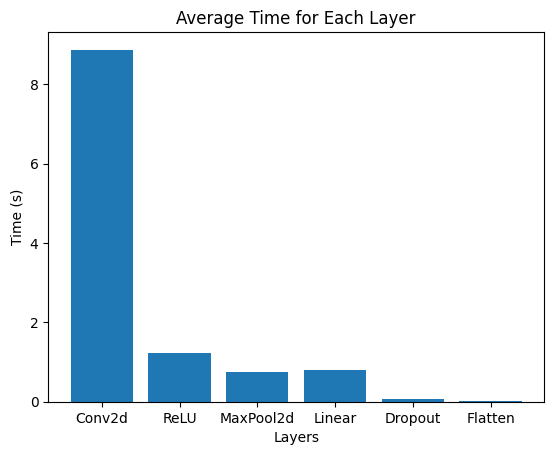

In [25]:
# plot the average time for each layer
fig, ax = plt.subplots()
labels = ['Conv2d', 'ReLU', 'MaxPool2d', 'Linear', 'Dropout', 'Flatten']
ax.bar(labels, Time_Layers_Avg)
ax.set_xlabel('Layers')
ax.set_ylabel('Time (s)')
ax.set_title('Average Time for Each Layer')
plt.show()

#### Time_AllEpochs

In [7]:
print('For each epoch, the time of each layer is: \n', 
      'The Time to Device time of all epoch: \n', Time_AllEpochs[:,0].T, '\n',
      'The Forward time of all epoch: \n', Time_AllEpochs[:,1].T, '\n',
      'The Calculate Loss time of all epoch: \n', Time_AllEpochs[:,2].T, '\n',
      'The Backward time of all epoch: \n', Time_AllEpochs[:,3].T, '\n',
      'The Optimize time of all epoch: \n', Time_AllEpochs[:,4].T, '\n',
      'The Test time of all epoch: \n', Time_AllEpochs[:,5].T)

For each epoch, the time of each layer is: 
 The Time to Device time of all epoch: 
 [2.01846266 2.01556015 2.02784991 2.01978135 2.02200031 2.02678752
 2.02975178 2.02637482 2.01951981 2.02077913] 
 The Forward time of all epoch: 
 [11.34303212 11.27524161 11.24169922 11.31822419 11.3406179  11.36743665
 11.3598268  11.38411927 11.40151262 11.43627024] 
 The Calculate Loss time of all epoch: 
 [0.11691356 0.08718204 0.12275863 0.12359166 0.13574481 0.13290048
 0.14092183 0.14789796 0.1434803  0.14996696] 
 The Backward time of all epoch: 
 [22.54984283 22.71433735 22.73897624 22.87535906 22.90711999 22.94262671
 22.93715119 22.97221112 23.0044663  23.03955889] 
 The Optimize time of all epoch: 
 [0.99421406 1.00042558 1.00822639 0.99851394 0.99966002 0.99669623
 1.0016098  1.00137901 0.99067497 0.99667501] 
 The Test time of all epoch: 
 [2.78425646 2.78267741 2.78687191 2.79208779 2.80643249 2.82244992
 2.81126761 2.8075223  2.82726216 2.80614257]


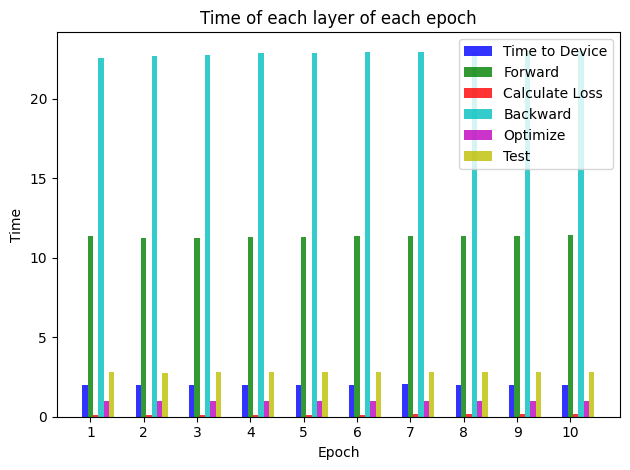

In [8]:
# plot each epoch's time to device, forward, calculate loss, backward, optimize, test using matplotlib with bar chart in one figure
fig, ax = plt.subplots()
index = np.arange(10)
bar_width = 0.1
opacity = 0.8
rects1 = plt.bar(index, Time_AllEpochs[:,0].T, bar_width, alpha=opacity, color='b', label='Time to Device')
rects2 = plt.bar(index+bar_width, Time_AllEpochs[:,1].T, bar_width, alpha=opacity, color='g', label='Forward')
rects3 = plt.bar(index+2*bar_width, Time_AllEpochs[:,2].T, bar_width, alpha=opacity, color='r', label='Calculate Loss')
rects4 = plt.bar(index+3*bar_width, Time_AllEpochs[:,3].T, bar_width, alpha=opacity, color='c', label='Backward')
rects5 = plt.bar(index+4*bar_width, Time_AllEpochs[:,4].T, bar_width, alpha=opacity, color='m', label='Optimize')
rects6 = plt.bar(index+5*bar_width, Time_AllEpochs[:,5].T, bar_width, alpha=opacity, color='y', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Time of each layer of each epoch')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.legend()
plt.tight_layout()
plt.show()

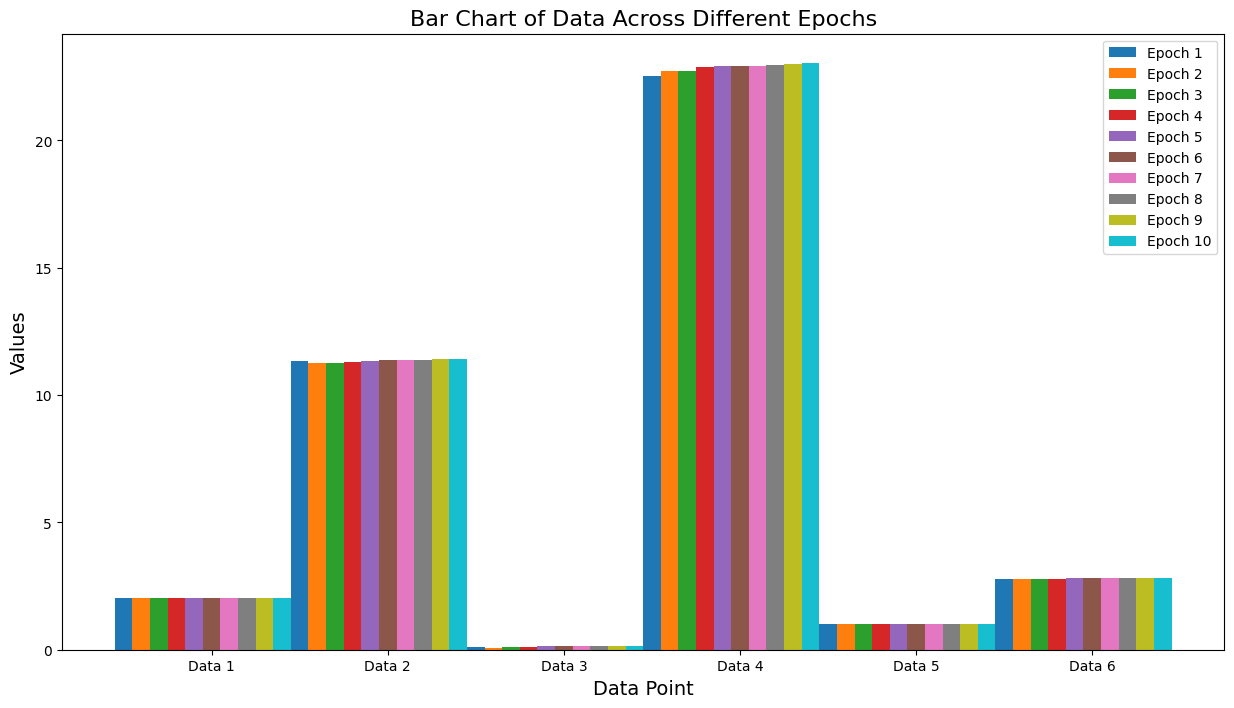

In [9]:
# Number of epochs
epochs = Time_AllEpochs.shape[0]
# Setting up the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
# Width of a bar
bar_width = 0.1
# Creating an index for each set of bars
index = np.arange(Time_AllEpochs.shape[1])
# Plotting each epoch's data
for i in range(epochs):
    ax.bar(index + i*bar_width, Time_AllEpochs[i, :], bar_width, label=f'Epoch {i+1}')
# Adding labels and title
ax.set_xlabel('Data Point', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Bar Chart of Data Across Different Epochs', fontsize=16)
ax.set_xticks(index + bar_width * epochs / 2)
ax.set_xticklabels([f'Data {i+1}' for i in range(Time_AllEpochs.shape[1])])
ax.legend()
# Showing the plot
plt.show()

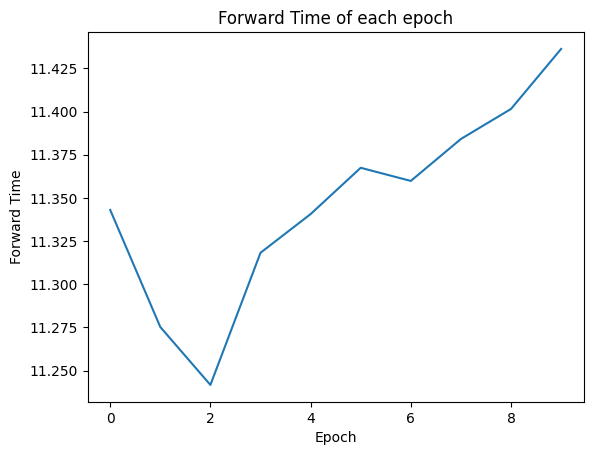

In [10]:
# plot the Forward time of each epoch using matplotlib with line in one figure
plt.plot(Time_AllEpochs[:,1].T)
plt.xlabel('Epoch')
plt.ylabel('Forward Time')
plt.title('Forward Time of each epoch')
plt.show()

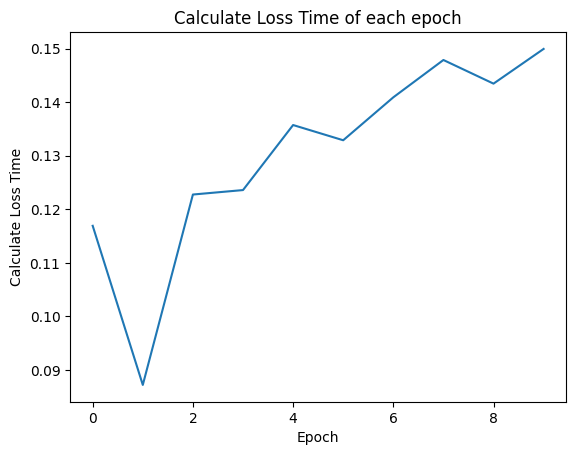

In [11]:
# plot the Calculate Loss of each epoch using matplotlib with line in one figure
plt.plot(Time_AllEpochs[:,2].T)
plt.xlabel('Epoch')
plt.ylabel('Calculate Loss Time')
plt.title('Calculate Loss Time of each epoch')
plt.show()

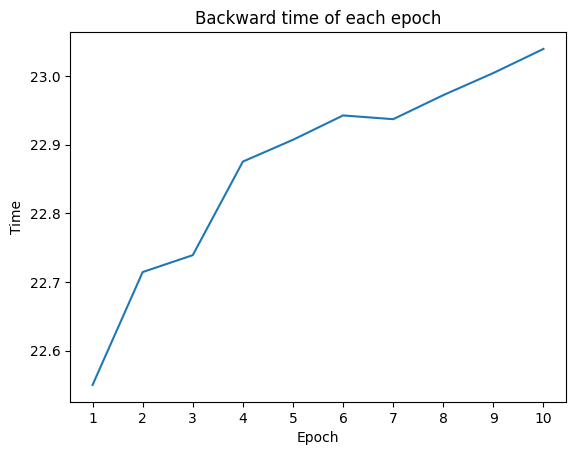

In [12]:
# plot the Backward time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllEpochs[:,3].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Backward time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

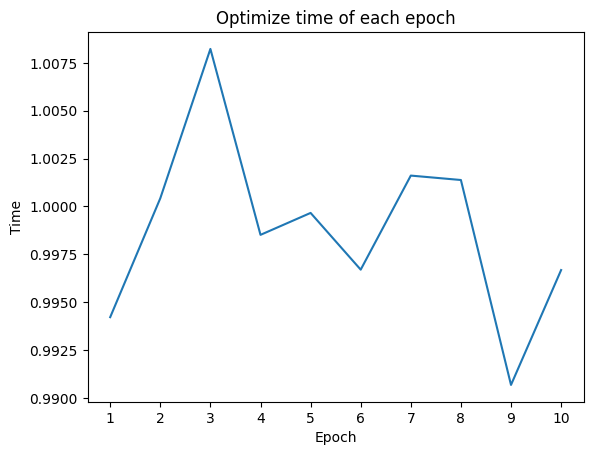

In [13]:
# plot the Optimize time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllEpochs[:,4].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Optimize time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

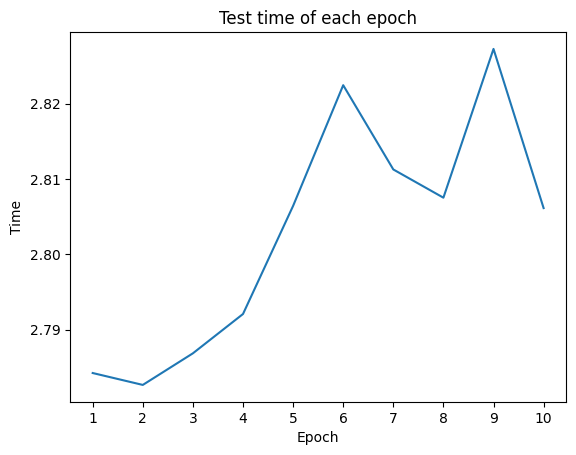

In [14]:
# plot the Test time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllEpochs[:,5].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Test time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

#### Energy_AllEpochs 

In [15]:
print(Energy_AllEpochs.shape)

(10, 1)


In [16]:
for epoch in range(len(Energy_AllEpochs)):
    print('Epoch: ', epoch+1, 'The total recorded time is: ', len(Energy_AllEpochs[epoch][0]))

Epoch:  1 The total recorded time is:  43
Epoch:  2 The total recorded time is:  43
Epoch:  3 The total recorded time is:  43
Epoch:  4 The total recorded time is:  43
Epoch:  5 The total recorded time is:  44
Epoch:  6 The total recorded time is:  44
Epoch:  7 The total recorded time is:  44
Epoch:  8 The total recorded time is:  44
Epoch:  9 The total recorded time is:  44
Epoch:  10 The total recorded time is:  44


In [17]:
# calculate the total energy consumption of each epoch
Energy_AllEpochs_Total = []
for epoch in range(len(Energy_AllEpochs)):
    Energy_AllEpochs_Total.append(sum(Energy_AllEpochs[epoch][0]))
    print(f'The total energy consumption of each epoch is: {Energy_AllEpochs_Total[epoch]:.3f}')

The total energy consumption of each epoch is: 3291.180
The total energy consumption of each epoch is: 3384.140
The total energy consumption of each epoch is: 3387.250
The total energy consumption of each epoch is: 3388.260
The total energy consumption of each epoch is: 3467.660
The total energy consumption of each epoch is: 3467.020
The total energy consumption of each epoch is: 3471.670
The total energy consumption of each epoch is: 3473.610
The total energy consumption of each epoch is: 3471.800
The total energy consumption of each epoch is: 3472.990


#### train acc and test acc

In [18]:
print(TestAcc)

[0.7233 0.7879 0.8236 0.8295 0.8534 0.8604 0.8704 0.8709 0.8758 0.884 ]


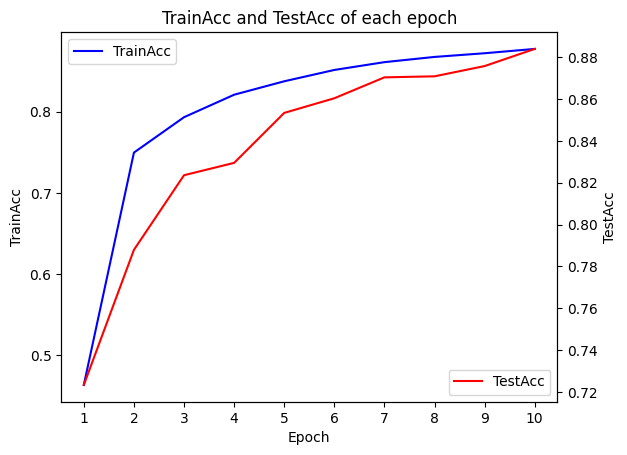

In [19]:
# plot the TrainAcc and TestAcc of each epoch using matplotlib with line in one figure, the left y-axis is for TrainAcc and the right y-axis is for TestAcc
# add the legend for TrainAcc and TestAcc, put it to the bottom right
fig, ax1 = plt.subplots()
index = np.arange(10)
plt.plot(index, TrainAcc, 'b-')
plt.xlabel('Epoch')
plt.ylabel('TrainAcc')
plt.legend(['TrainAcc'], loc='upper left')
plt.title('TrainAcc and TestAcc of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))

ax2 = ax1.twinx()
plt.plot(index, TestAcc, 'r-')
plt.ylabel('TestAcc')
plt.legend(['TestAcc'], loc='lower right')
plt.show()


In [26]:
print(TTrainEval.shape)

(10,)
